### SGD IMPLEMENTATION ###

Stochastic Gradient Descent (SGD) is an iterative optimization technique commonly used to minimize an objective function (often a loss function in machine learning) by updating model parameters (weights and bias) in a way that gradually reduces the error of predictions.

In gradient descent, the goal is to find the minimum of a function by modifying at each step the weights and bias through the calculation of the derivatives on all data points to find the minimum. In SGD, we limit ourselves to one random datapoints / to a little batch of random datapoints (I have implemented both in the following TP) so that the calculation of the minimum of the loss function is minimum. In this case, our loss function can be written 
$$
L(w, b) = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \left( X_i \cdot w + b \right) \right)^2
$$

 Steps in SGD:
 1. Initialize model parameters (weights and bias) to zero or small random values.
 2. For a predefined number of epochs (iterations over the dataset):
    a. Select a random sample (or mini-batch) from the dataset.
    b. Compute the model's prediction based on the current weights and bias.
    c. Calculate the error as the difference between the predicted and actual output.
    d. Compute the gradients of the loss function with respect to the model parameters (partial derivatives).
    e. Update the weights and bias using the gradients scaled by the learning rate (alpha).
 3. Continue the above steps until convergence or the maximum number of epochs is reached.

Advantages:
 - Efficient for large datasets: Since only one sample or mini-batch is used for each update, SGD is more memory-efficient and computationally faster than batch gradient descent.
 - Can escape local minima: The randomness introduced by using individual samples or mini-batches helps SGD to jump out of local minima, potentially reaching a better global minimum.

Overall, SGD is a widely used optimization algorithm in machine learning and deep learning, especially for training models on large datasets. Adjustments such as momentum, learning rate scheduling, and mini-batches can improve its performance and convergence stability.

In [1]:
import numpy as np

def SGD(X, y, alpha, epochs):
    """
    Stochastic Gradient Descent with a bias term
    :param X: input data (assumed normalized/standardized)
    :param y: output data
    :param alpha: learning rate
    :param epochs: number of iterations
    :return: weight and bias
    """
    n_samples, n_features = X.shape
    w = np.zeros(n_features)  # initialize weights
    b = 0  # initialize bias
    
    for epoch in range(epochs):
        # Optionally shuffle data here if using all samples per epoch
        i = np.random.randint(n_samples)  # pick a random sample
        y_hat = X[i] @ w + b  # prediction with bias
        error = y[i] - y_hat
        grad_w = -2 * X[i] * error  # gradient for weights
        grad_b = -2 * error  # gradient for bias
        w -= alpha * grad_w  # update weights
        b -= alpha * grad_b  # update bias

    return w, b


def SGD_with_mini_batch(X, y, alpha, epochs, batch_size=10):
    """
    Stochastic Gradient Descent with a bias term and mini-batch averaging
    :param X: input data (assumed normalized/standardized)
    :param y: output data
    :param alpha: learning rate
    :param epochs: number of iterations
    :param batch_size: number of samples per batch
    :return: weight and bias
    """
    n_samples, n_features = X.shape
    w = np.zeros(n_features)  # initialize weights
    b = 0  # initialize bias

    for epoch in range(epochs):
        # Select a random mini-batch of indices
        indices = np.random.choice(n_samples, batch_size, replace=False)
        X_batch = X[indices]
        y_batch = y[indices]

        # Compute predictions and errors for the batch
        y_hat_batch = X_batch @ w + b
        error_batch = y_batch - y_hat_batch

        # Compute gradients for weights and bias based on the batch
        grad_w = -2 * (X_batch.T @ error_batch) / batch_size  # mean gradient for weights
        grad_b = -2 * np.mean(error_batch)  # mean gradient for bias

        # Update weights and bias
        w -= alpha * grad_w
        b -= alpha * grad_b

    return w, b

2. Sample a set of observations {zi}n i=1 by generating a collection
 of random points xi of R2, ¯ w ∈ R2 seen as the normal vector
 of an hyperplane, a straight line here, and assigning the label yi
 according to the side of the hyperplane the point xi is.

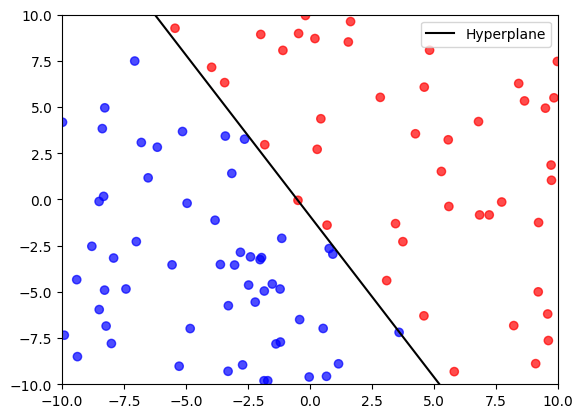

In [2]:
# Sample data randomly from R2 and take w the normal vector of a hyperplane to make a straight line and assign y as 1 or -1
import numpy as np
import matplotlib.pyplot as plt

def sample(n):
    X = np.random.uniform(-10 , 10, (n,2))
    w = np.random.rand(2)
    b = np.random.rand()
    y = np.sign(np.dot(X, w) + b)
    return X, y, w, b

def plot(X, y, w, b):
    # Tracer les points avec une couleur en fonction de la classe (y = -1 ou 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
    
    # Calculer la ligne de séparation (hyperplan)
    x_vals = np.array([-10, 10])  # Valeurs des abscisses
    # Calculer les ordonnées correspondantes de la ligne (w[0] * x + w[1] * y + b = 0)
    y_vals = -(w[0] * x_vals + b) / w[1]
    
    # Tracer la ligne de séparation
    plt.plot(x_vals, y_vals, 'k-', label='Hyperplane')

    # Définir les limites du graphe
    plt.xlim([-10, 10])
    plt.ylim([-10, 10])
    
    # Afficher la légende et le graphe
    plt.legend()
    plt.show()

X, y, w, b = sample(100)
plot(X, y, w, b)


3. Test the algorithm you wrote at the first question over these observations.

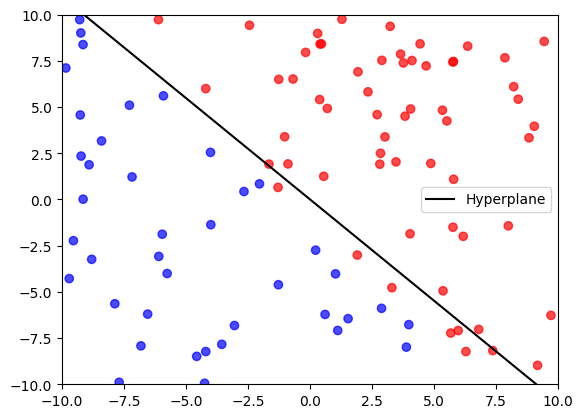

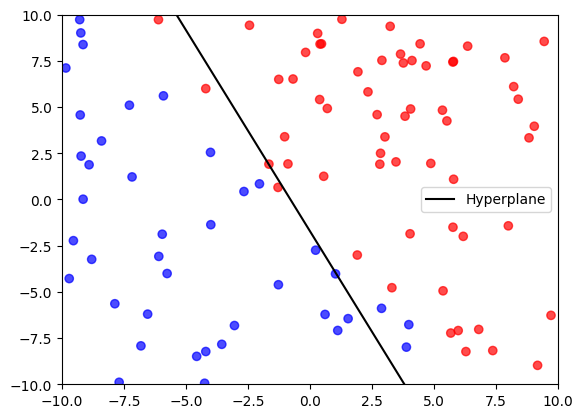

Reel w parametres are [0.8227706  0.65690617] and 0.649120707359879
SGD w parametres are [0.11172987 0.10191837] and 0.0
SGD w parametres with batches are [0.13057767 0.06000893] and 0.10362446742148747


In [17]:
## Test the SGD function
X, y, w, b = sample(100)
w_sgd, b_sgd = SGD(X, y, 0.001, 1000)
w_sgd_batch, b_sgd_batch = SGD_with_mini_batch(X, y, 0.001, 1000)
plot(X, y, w_sgd, b_sgd)
plot(X,y, w_sgd_batch, b_sgd_batch)
print(f"Reel w parametres are {w} and {b}")
print(f"SGD w parametres are {w_sgd} and {b_sgd}")
print(f"SGD w parametres with batches are {w_sgd_batch} and {b_sgd_batch}")

We underline that the parameters calculated are far from the real ones. However, we can see in the graphs that the hyperplane are quite close to each other, which means that our calculated $b$ and $w$ are quite good for both the method with and without batches.

We also see that the method with batches generally converges better, which is expected as we use more datapoints to adapt our wiehgts and bias.

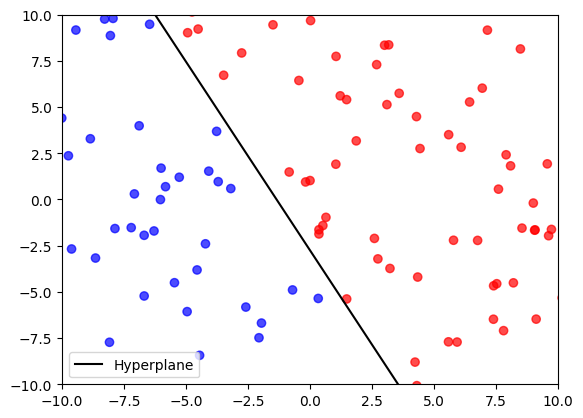

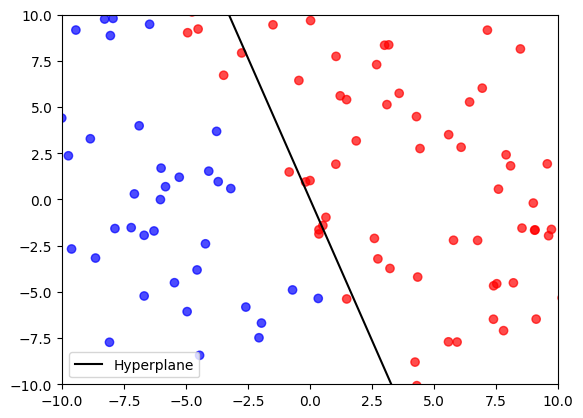

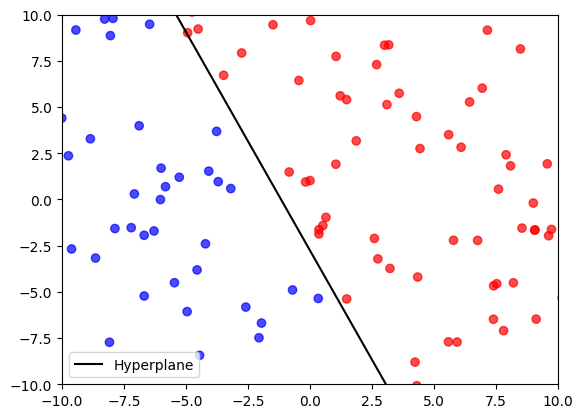

Reel w parametres are [0.49466837 0.2423533 ] and 0.6686226107080888
SGD w parametres are [0.06059414 0.01983624] and 0.0
SGD w parametres with batches are [0.138492   0.05857357] and 0.16225926772735094


In [18]:
# Add gaussian noise to the data
X, y, w, b = sample(100)
X += np.random.normal(0, 0.5, X.shape)
plot(X, y, w, b)

w_sgd, b_sgd = SGD(X, y, 0.01, 1000)
w_sgd_batch, b_sgd_batch = SGD_with_mini_batch(X, y, 0.001, 1000)
plot(X, y, w_sgd, b_sgd)
plot(X,y, w_sgd_batch, b_sgd_batch)
print(f"Reel w parametres are {w} and {b}")
print(f"SGD w parametres are {w_sgd} and {b_sgd}")
print(f"SGD w parametres with batches are {w_sgd_batch} and {b_sgd_batch}")

We underline that the parameters calculated are far from the real ones. However, we can see in the graphs that the hyperplane are quite close to each other, which means that our calculated $b$ and $w$ are quite good for both the method with and without batches.

In the case where we add gaussian noises, we see that globally, the method where we select only one sample can make the system tend to wrong results quite fast, as some noise really change the weights and biases, whereas the method with batches limits the variations and is thus far more fiable. 

In [5]:
# Use it on wdbc.data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('wdbc.data', header=None)
data = data.drop(columns=0)
data[1] = data[1].map({'M': -1, 'B': 1})
X = data.drop(columns=1)
y = data[1]
# Scaler les données
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
w = np.random.rand(X_train.shape[1])
b = np.random.rand()
y_train = np.array(y_train)
w_sgd, b_sgd = SGD(X_train, y_train, 0.01, 10000)
w_sgd_batch, b_sgd_batch = SGD_with_mini_batch(X_train, y_train, 0.01, 10000, 10)


In [13]:
# Test the model
def predict(X, w, b):
    return np.sign(X @ w + b)

y_pred = predict(X_test, w_sgd, b_sgd)
y_pred_batch = predict(X_test, w_sgd_batch, b_sgd_batch)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy_batch = accuracy_score(y_test, y_pred_batch)
print(f"The accuracy of the model with SGD is {accuracy} and the model with mini-batches is {accuracy_batch}")


The accuracy of the model with SGD is 0.9122807017543859 and the model with mini-batches is 0.956140350877193


In [12]:
## Calculate les TP FN FP TN

def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == -1) & (y_pred == -1))
    FP = np.sum((y_true == -1) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == -1))
    return TP, TN, FP, FN

TP, TN, FP, FN = confusion_matrix(y_test, y_pred)
print(f"The confusion matrix for the SGD model is: TP={TP}, TN={TN}, FP={FP}, FN={FN}")

The confusion matrix for the SGD model is: TP=65, TN=39, FP=4, FN=6
